In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
#csv_files=["/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_verified.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/whisper_tapas_verif_vad_chunk.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas16k_wav2vec.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_vad_whisper_medium.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_whisper_medium.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_hmm_tdnn_rouas.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_conf_ester_rouas.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_tapas_conf_cv_rouas.csv"]
#labels = ["Wav2vec", "Whisper-VAD-chunk", "Wav2vec16K", "Whisper-VAD","Whisper-medium","HMM-TDNN","Conformer(ester)","Conformer(CV)"]
#csv_files=["/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_rhap.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_rhap_whisper_medium.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/whisper_rhap_vad_chunk.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_hmm_tdnn_rouas.csv","/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_rhap_conformer_rouas.csv"]
#labels =["wav2vec","Whisper-medium","Whisper-VAD-chunk","Hmm-TDNN(ester)","Conformer(ester)"]
csv_files = ["/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_typaloc_CEREB_wav2vec.csv",""]
labels = []
wer_data = []
for ids,f in enumerate(csv_files):
    d=f"Data {ids}"
    d=pd.read_csv(f)
    wer_data.append(d["WER"].dropna())

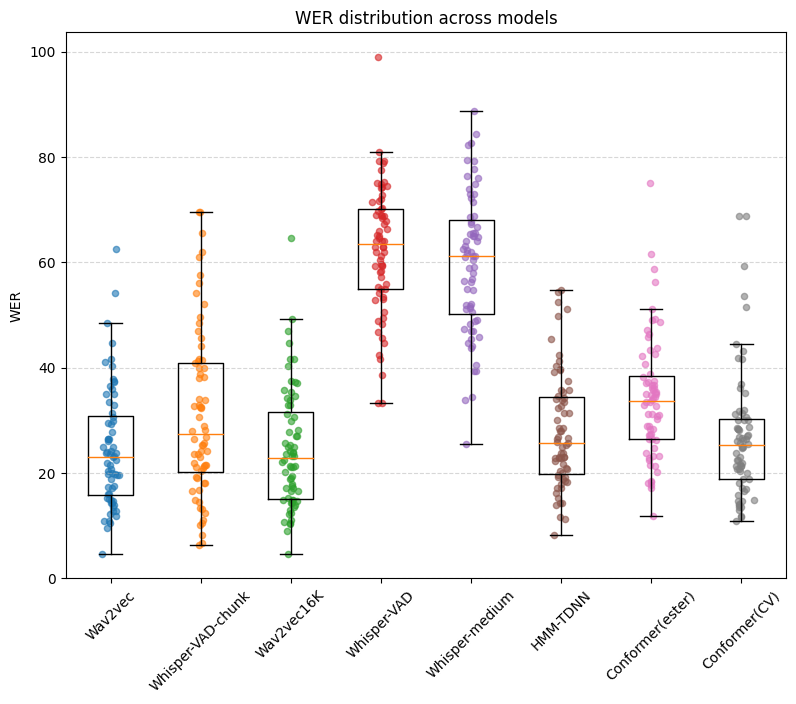

In [25]:
plt.figure(figsize=(8, 6))

# Boxplot
plt.boxplot(wer_data, labels=labels, showfliers=False)

# Overlay data points
for i, values in enumerate(wer_data, start=1):
    x = np.random.normal(i, 0.04, size=len(values))  # jitter
    plt.scatter(x, values, alpha=0.6, s=20)
plt.tight_layout()
plt.ylabel("WER")
plt.xticks(rotation=45)
plt.title("WER distribution across models")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.savefig("/vol/experiments3/imbenamor/TAPAS-FRAIS/figures/wer_t_plot.png")
plt.show()


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

experiments = ["Wav2vec", "Whisper-VAD-chunk"]
datasets = ["CEREB", "PARK", "SLA", "CTR"]

files = {
    "Wav2vec": ["/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_typaloc_CEREB_wav2vec.csv", "/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_typaloc_PARK_wav2vec.csv", "/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_typaloc_SLA_wav2vec.csv", "/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/wer_typaloc_CTR_wav2vec.csv"],
    "Whisper-VAD-chunk": ["/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/whisper_CEREB_vad_chunk.csv", "/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/whisper_PARK_VAD_chunk.csv", "/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/whisper_SLA_vad_chunk.csv", "/vol/experiments3/imbenamor/TAPAS-FRAIS/logs/csv_files/whisper_CTR_vad_chunk.csv"],
}

# Load data
data = {}
for exp in experiments:
    data[exp] = []
    for f in files[exp]:
        df = pd.read_csv(f)
        data[exp].append(df["WER"].dropna().values)



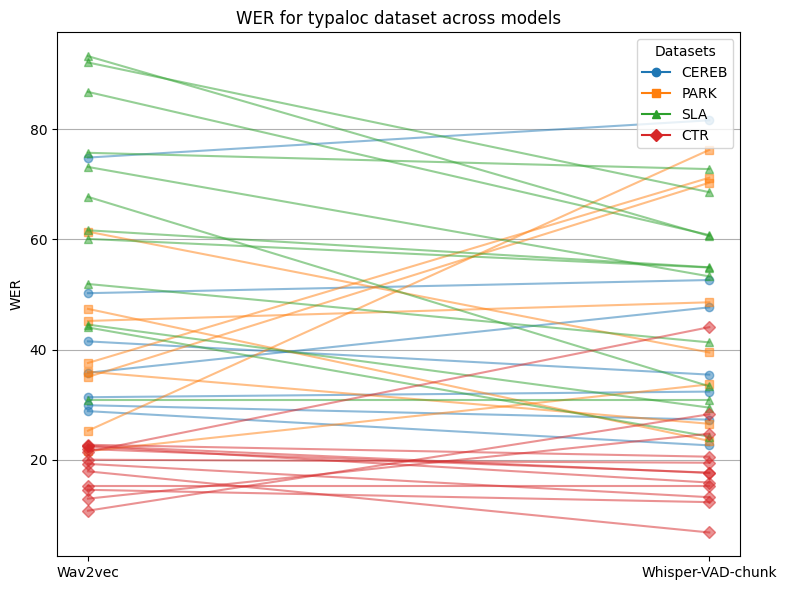

In [38]:
markers = ["o", "s", "^", "D"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

plt.figure(figsize=(8, 6))
from matplotlib.lines import Line2D

legend_handles = [
    Line2D(
        [0], [0],
        color=colors[i],
        marker=markers[i],
        linestyle="-",
        label=datasets[i]
    )
    for i in range(n_datasets)
]

plt.legend(
    handles=legend_handles,
    title="Datasets",
    loc="best"
)

for i in range(n_datasets):
    for k in range(len(data[experiments[0]][i])):
        y = [data[exp][i][k] for exp in experiments]
        plt.plot(
            experiments, y,
            color=colors[i], alpha=0.5,
            marker=markers[i], markersize=6
        )

plt.ylabel("WER")
plt.title("WER for typaloc dataset across models")
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig("/vol/experiments3/imbenamor/TAPAS-FRAIS/figures/wer_typaloc_plot.png")
plt.show()
